Pipe1 :
To check if user input image is a car or not.
Data0 - dataset of all images of cars(damaged and undamaged ones)

In [1]:
import os
import h5py
import urllib.request
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk
from IPython.display import Image, display, clear_output
from collections import Counter, defaultdict
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
#from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.utils.data_utils import get_file
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, History

In [3]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [7]:
import tarfile

fname = 'C:/Users/nthaku3/CS_512_Project/car-damage-dataset.tar.gz'

if fname.endswith("tar.gz"):
    tar = tarfile.open(fname, "r:gz")
    tar.extractall()
    tar.close()
    

In [4]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}") # show the shape of the image
    return img

Image shape: (183, 275, 3)


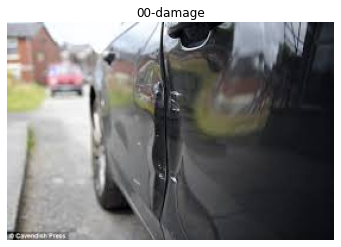

In [5]:
# View a random image 
img = view_random_image(target_dir="C:/Users/nthaku3/CS_512_Project/preprocessed/data1a/training/",
                        target_class="00-damage")

In [6]:
train="C:/Users/nthaku3/CS_512_Project/preprocessed/data1a/training"
test="C:/Users/nthaku3/CS_512_Project/preprocessed/data1a/validation"

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42, subset='training' )

valid_data = test_datagen.flow_from_directory(test,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
model_0 = Sequential([
  Conv2D(16, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),

  Flatten(),
  Dense(64, activation="relu"),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_0.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_0 = model_0.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
58/58 [==============================] - 51s 876ms/step - loss: 0.6541 - accuracy: 0.6000 - val_loss: 0.5944 - val_accuracy: 0.6891
Epoch 2/5
58/58 [==============================] - 53s 915ms/step - loss: 0.5398 - accuracy: 0.7435 - val_loss: 0.5297 - val_accuracy: 0.7543
Epoch 3/5
58/58 [==============================] - 47s 814ms/step - loss: 0.4656 - accuracy: 0.7891 - val_loss: 0.4763 - val_accuracy: 0.7522
Epoch 4/5
58/58 [==============================] - 45s 778ms/step - loss: 0.3528 - accuracy: 0.8489 - val_loss: 0.4705 - val_accuracy: 0.7783
Epoch 5/5
58/58 [==============================] - 45s 778ms/step - loss: 0.2719 - accuracy: 0.8940 - val_loss: 0.4243 - val_accuracy: 0.8130


In [8]:
base_model = tf.keras.applications.VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.layers[0].trainable = False

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

# Fit the model 
history = model.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

80150528/80134624 [==============================] - 4s 0us/step
Epoch 1/10
58/58 [==============================] - 359s 6s/step - loss: 0.4367 - accuracy: 0.8022 - val_loss: 0.3799 - val_accuracy: 0.8413
Epoch 2/10
58/58 [==============================] - 499s 9s/step - loss: 0.2694 - accuracy: 0.8821 - val_loss: 0.2607 - val_accuracy: 0.8870
Epoch 3/10
58/58 [==============================] - 430s 7s/step - loss: 0.1856 - accuracy: 0.9255 - val_loss: 0.2752 - val_accuracy: 0.8913
Epoch 4/10
58/58 [==============================] - 347s 6s/step - loss: 0.1605 - accuracy: 0.9429 - val_loss: 0.2250 - val_accuracy: 0.9065
Epoch 5/10
58/58 [==============================] - 338s 6s/step - loss: 0.1211 - accuracy: 0.9554 - val_loss: 0.2225 - val_accuracy: 0.9239
Epoch 6/10
58/58 [==============================] - 338s 6s/step - loss: 0.1028 - accuracy: 0.9696 - val_loss: 0.2617 - val_accuracy: 0.8978
Epoch 7/10
58/58 [==============================] - 383s 7s/step - loss: 0.0890 - accurac

In [9]:
model.save('car_damage_or_not_detection-VGG19model.h5')

In [10]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    
    # Read in target file (an image)
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor & ensure 3 colour channels 
    img = tf.image.decode_image(img, channels=3)

    # Resize the image (to the same size our model was trained on
    img = tf.image.resize(img, size = [img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def pred_and_plot(model, filename):
    
    #Import the target image and preprocess it
    
    img = load_and_prep_image(filename)

    #Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred=pred.round()
    if pred==0:
        pred_class="Damage"
    else:
        pred_class="No Damage"  
    
    #Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

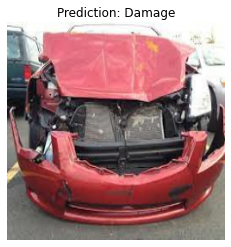

In [11]:
# Test our model 
pred_and_plot(model, "C:/Users/nthaku3/CS_512_Project/preprocessed/test1.jpg")

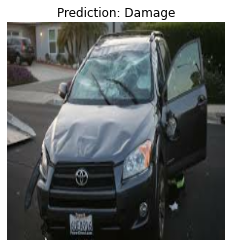

In [12]:
# Test our model 
pred_and_plot(model, "C:/Users/nthaku3/CS_512_Project/preprocessed/test2.jpg")

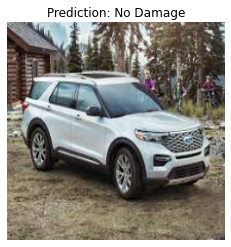

In [13]:
# Test our model 
pred_and_plot(model, "C:/Users/nthaku3/CS_512_Project/preprocessed/test3.jpg")